### References

- https://matplotlib.org/3.1.0/tutorials/colors/colorbar_only.html
- https://m31phy.tistory.com/220
- https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
- https://github.com/PacktPublishing/Matplotlib-3.0-Cookbook/blob/master/Chapter04/Chapter%204%20-%20Developing%20Visualizations%20For%20Publishing%20Quality.ipynb
- https://frhyme.github.io/python-lib/matplotlib_extracting_color_from_cmap/
- https://stackoverflow.com/questions/43805821/matplotlib-add-colorbar-to-non-mappable-object

### 1. Create ColorbarBase
- The main application of using a `.ColorbarBase` explicitly is drawing
colorbars that are not associated with other elements in the figure, e.g.
when showing a colormap by itself.

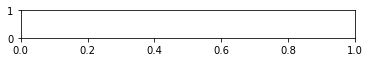

In [52]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

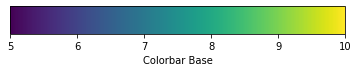

In [53]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.get_cmap('viridis')
norm = mpl.colors.Normalize(vmin=5, vmax=10)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Colorbar Base')

In [54]:
print(type(cb1))

<class 'matplotlib.colorbar.ColorbarBase'>


### 2. Creating Colorbar by using ScalarMappable

In [55]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

data = np.random.rand(14,16)

#### 1) Imshow

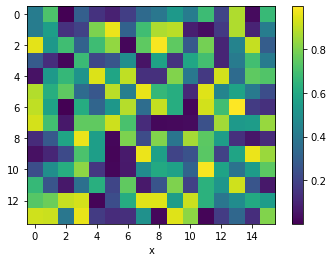

In [56]:
fig, ax = plt.subplots()
im = ax.imshow(data)
ax.set_xlabel("x")

cb = fig.colorbar(im, pad=0.05)

In [57]:
print(type(im))

<class 'matplotlib.image.AxesImage'>


#### 2) Pcolor

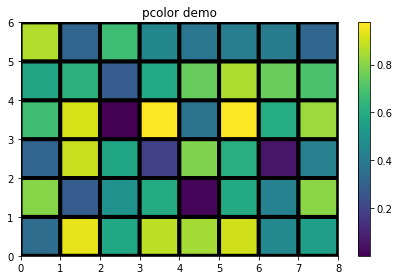

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

Z = np.random.rand(6, 8)

fig, ax = plt.subplots()
pcol = ax.pcolor(Z, edgecolors='k', linewidths=4)
ax.set_title('pcolor demo')
cb = fig.colorbar(pcol) 
fig.tight_layout()

In [40]:
print(type(pcol))

<class 'matplotlib.collections.PolyCollection'>


#### 3) contourf

In [60]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

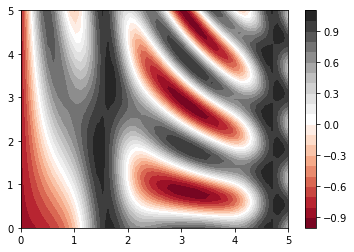

In [61]:
fig, ax = plt.subplots()
contour_map = ax.contourf(X, Y, Z, 20, cmap='RdGy')
fig.colorbar(contour_map);

In [32]:
print(type(contour_map))

<class 'matplotlib.contour.QuadContourSet'>


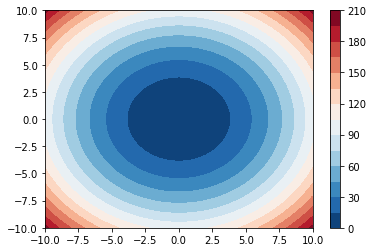

In [62]:
def f(x,y):
    return x**2 + y**2

xrange = np.linspace(-10,10,100)
yrange = np.linspace(-10,10,100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

zmesh = f(xmesh, ymesh)

fig, ax = plt.subplots()
contour_map = ax.contourf(xmesh, ymesh, zmesh, levels=15, cmap='RdBu_r')
fig.colorbar(contour_map)

In [34]:
print(type(contour_map))

<class 'matplotlib.contour.QuadContourSet'>


#### 4) Scatter Plot

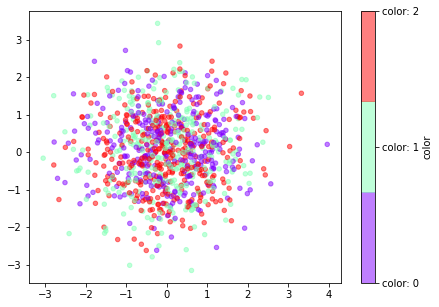

In [63]:
sample_size = 1000
color_num = 3

X = np.random.normal(0, 1, sample_size)
Y = np.random.normal(0, 1, sample_size)
C = np.random.randint(0, color_num, sample_size)

fig, ax = plt.subplots(figsize=(7, 5))
scatter_map = ax.scatter(X, Y, c=C, s=20, cmap=plt.cm.get_cmap('rainbow', color_num), alpha=0.5)
fig.colorbar(scatter_map, ticks=range(color_num), format='color: %d', label='color')

In [36]:
print(type(scatter_map))

<class 'matplotlib.collections.PathCollection'>


## 3. ScalarMappable "on-the-fly"

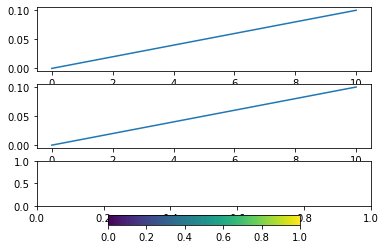

In [64]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

x = np.linspace(0,10,100)
y = 0.01*x

fig, axes = plt.subplots(nrows=3)
for i in range(2):
    axes[i].plot(x,y)
fig.colorbar(mpl.cm.ScalarMappable(cmap='viridis'), ax=axes[-1], orientation='horizontal')

### ref : https://stackoverflow.com/questions/43805821/matplotlib-add-colorbar-to-non-mappable-object

In [66]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 100)
N = 21
cmap = plt.get_cmap('jet',N)

Text(0, 0.5, 'y')

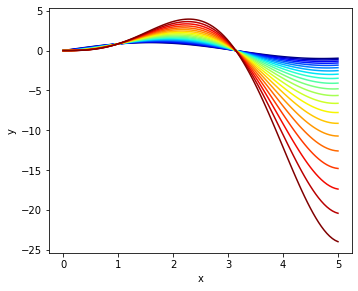

In [67]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.10,0.10,0.70,0.85])

for i,n in enumerate(np.linspace(0,2,N)):
    y = np.sin(x)*x**n
    ax.plot(x,y,c=cmap(i))

ax.set_xlabel('x')
ax.set_ylabel('y')

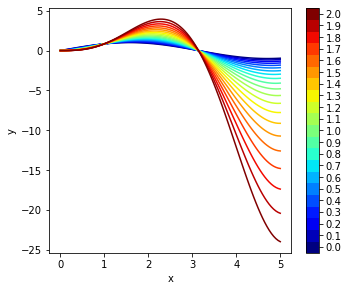

In [68]:
norm = mpl.colors.Normalize(vmin=0,vmax=2)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])

fig.colorbar(sm, ticks=np.linspace(0,2,N),boundaries=np.arange(-0.05,2.1,.1), ax=ax)
fig

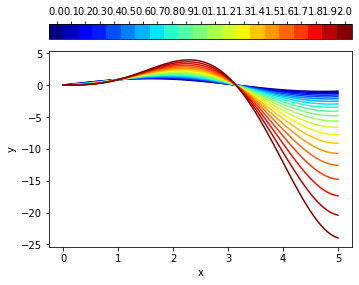

In [69]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.10,0.10,0.70,0.85])

for i,n in enumerate(np.linspace(0,2,N)):
    y = np.sin(x)*x**n
    ax.plot(x,y,c=cmap(i))

ax.set_xlabel('x')
ax.set_ylabel('y')

norm = mpl.colors.Normalize(vmin=0,vmax=2)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])

fig.colorbar(sm, ticks=np.linspace(0,2,N),boundaries=np.arange(-0.05,2.1,.1)
            , location='top')

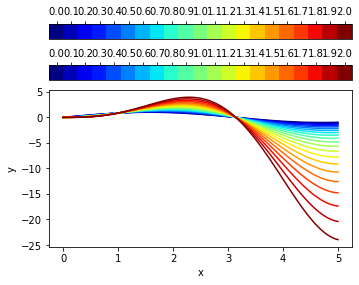

In [70]:
fig.colorbar(sm, ticks=np.linspace(0,2,N),boundaries=np.arange(-0.05,2.1,.1)
            , location='top')
fig